In [1]:
%matplotlib inline
import numpy
import colour
from colour.plotting import plot_image
import SpyderCHECKR24
import ColorCorrect

### Image Loading
Load the image in and linearize the RGB values in the sRGB colorspace

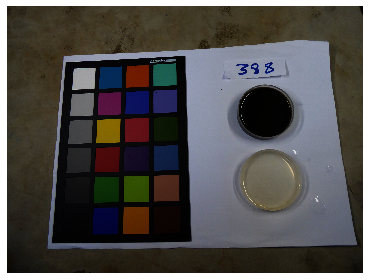

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [2]:
filename = 'JPG_uncorrected/388.JPG'
image = colour.cctf_decoding(colour.io.read_image(filename, method='Imageio'), function='sRGB')
plot_image(image)

### Color Correction
This is an example of the automatic color correction routine, which finds a color checker, and then uses this to correct the color of an image. We use numpy to clip the image to prevent numeric rollover

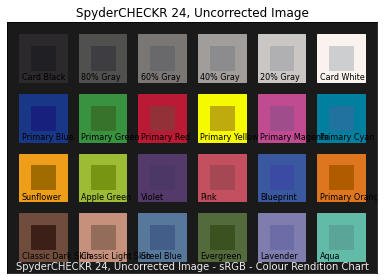

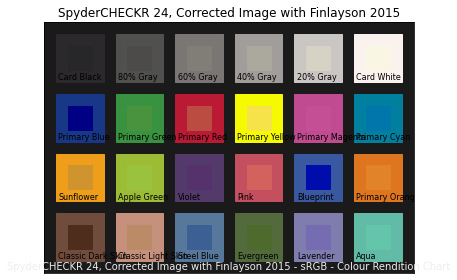

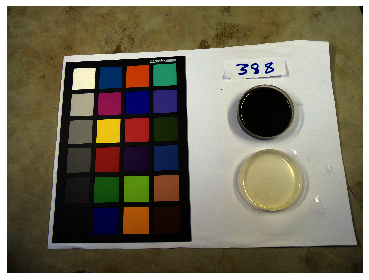

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [3]:
corrected_image = numpy.clip(ColorCorrect.color_correct(
                            image=image,
                            ref_color_checker=SpyderCHECKR24.colour_checker,
                            method='Finlayson 2015',
                            plot=True), # show the extracted color correction charts
                            0.0, 1.0)
plot_image(corrected_image)

### Contour Finding
This is an example of how the color_checker_detection works by finding contours in the image

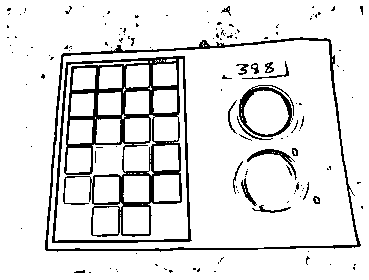

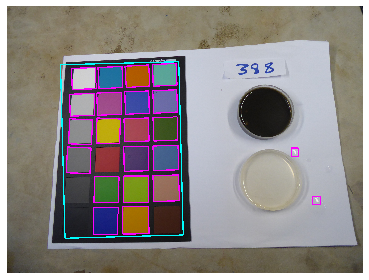

In [4]:
import cv2

from colour_checker_detection import (
    EXAMPLES_RESOURCES_DIRECTORY,
    colour_checkers_coordinates_segmentation,
    detect_colour_checkers_segmentation,
    extract_colour_checkers_segmentation
    )
from colour_checker_detection.detection.segmentation import (
    ASPECT_RATIO,
    adjust_image)

colour_checkers, clusters, swatches, segmented_image = (
    colour_checkers_coordinates_segmentation(
        image, additional_data=True))

image_a = adjust_image(image)

plot_image(colour.cctf_encoding(segmented_image))

cv2.drawContours(image_a, swatches, -1, (1, 0, 1), 3)
cv2.drawContours(image_a, clusters, -1, (0, 1, 1), 3)

plot_image(colour.cctf_encoding(image_a));